In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras

# MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# Variational Autoencoder

In [3]:
K = keras.backend

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [4]:
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="relu")(z)
z = keras.layers.Dense(100, activation="relu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = keras.layers.Dense(150, activation="relu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
model = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=-1)
model.add_loss(K.mean(latent_loss) / 784.)

In [5]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(x_train, x_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 271us/sample - loss: 0.1936 - accuracy: 0.8002
Epoch 2/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1563 - accuracy: 0.8071
Epoch 3/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.1500 - accuracy: 0.8082
Epoch 4/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1469 - accuracy: 0.8088
Epoch 5/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.1447 - accuracy: 0.8092


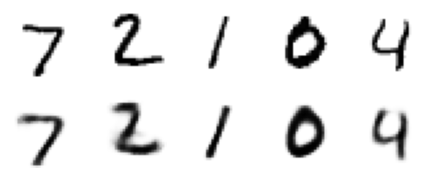

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=x_test, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        
show_reconstructions(model)

In [1]:
print("test")

test
